# 🛁 ControlNet Doodle-to-Image Generator
This notebook lets you:
- Upload a doodle (PNG/JPG)
- Enter a prompt (e.g., "a luxurious bathtub in a marble bathroom")
- Use Stable Diffusion + ControlNet (Scribble) to generate an image

📦 Powered by Hugging Face diffusers + ControlNet

In [12]:
import torch
from PIL import Image
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import matplotlib.pyplot as plt
import os

# Use GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load ControlNet model trained on scribbles
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-scribble",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)

# Load the SD pipeline with ControlNet
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
).to(device)

pipe.enable_xformers_memory_efficient_attention()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 2.00 MiB. GPU 0 has a total capacity of 19.57 GiB of which 2.00 MiB is free. Process 829596 has 13.97 GiB memory in use. Process 834895 has 5.59 GiB memory in use. Of the allocated memory 5.36 GiB is allocated by PyTorch, and 34.14 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

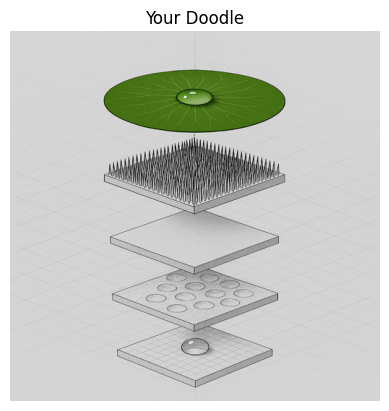

In [ ]:
# 📁 Step 3: Load your local doodle image
from PIL import Image
import matplotlib.pyplot as plt

# 🔄 Replace with your local file path
filename = "asteria.png"  # e.g., "doodles/bath_sketch.png"

# Load and display the doodle
doodle = Image.open(filename).convert("RGB").resize((512, 512))

plt.imshow(doodle)
plt.axis("off")
plt.title("Your Doodle")
plt.show()

In [ ]:
prompt = input("man")

In [ ]:
image = pipe(prompt=prompt, image=doodle, num_inference_steps=30, guidance_scale=8.5).images[0]

plt.imshow(image)
plt.axis("off")
plt.title("Generated Image")
plt.show()

os.makedirs("outputs", exist_ok=True)
image.save("outputs/generated_image.png")
print("Saved to outputs/generated_image.png")

  0%|          | 0/30 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 16.00 MiB. GPU 0 has a total capacity of 19.57 GiB of which 4.00 MiB is free. Process 829596 has 13.97 GiB memory in use. Process 834895 has 5.58 GiB memory in use. Of the allocated memory 5.35 GiB is allocated by PyTorch, and 42.69 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)